In [ ]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.optimizers import RMSprop, Adam
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io


Using TensorFlow backend.


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving python-input.txt to python-input.txt


In [ ]:
text = data_to_load["python-input.txt"].decode("utf-8").lower()

In [ ]:
print('corpus length:', len(text))

corpus length: 195853


In [ ]:
# for normal english
path = get_file(
    'nietzsche.txt',
    origin='https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt')
# https://s3.amazonaws.com/text-datasets/nietzsche.txt
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))
text = text[10249:645819]

5464064/5458199 [==============================] - 0s 0us/step
corpus length: 5458199


In [ ]:
chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

history = model.fit(x, y,
          batch_size=256,
          epochs=5,
          callbacks=[print_callback])

total chars: 56
nb sequences: 211844
Vectorization...
Build model...
Epoch 1/5
211844/211844 [==============================] - 192s 908us/step - loss: 2.5659

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "s; quick. methinks i hear
    antony cal"
s; quick. methinks i hear
    antony calle the the there and this  ind there theat and and and in the the ther and the the ther and ind ande the ther and the there the there and the pouthe the the that in the thar sous and and wor soure and and ind ind and ind and the thand and the ther and and and the the the there there that  ou there sor the there that in the there the there the there the there that  ou  ou here that  oud ind the the
----- diversity: 0.5
----- Generating with seed: "s; quick. methinks i hear
    antony cal"
s; quick. methinks i hear
    antony calole ho hare the thon worr bethis wor ind in the thers oud thare meor is there, and as ild lout thoure dof mead and in oa the inous ous sou

dict_keys(['loss'])


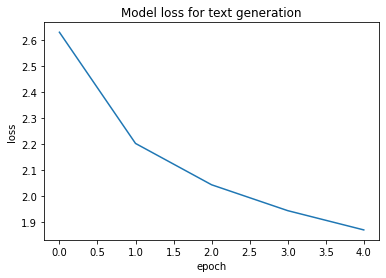

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss for text generation')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving output.txt to output (1).txt


In [ ]:
sentence = data_to_load["output.txt"].decode("utf-8").lower()
for i in range(4000):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_indices[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds, 1)
    next_char = indices_char[next_index]

    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

=trisss(gloo, "vars, intmat==las, blisd) a sewort py inglisttrethe
        paspretrad = '()

    def ese_type_rith(self, pasametern): # a d e gefar()
        parg ivtraneedersoad
    xovarimstifon_types_vernore:
        def ___names___one'

    def tet__bseted__paktanse_= belaces:
        areis = notels
            # th  suiplebate as nvters anc angedueprod:
        alst
    def __are_ty_eser(self) -> noter
    n'tedefattrod orgeederestrer(strfla[tt]):
        tinestainl(_type:
        id = 1wistrrpine[[st, ].gt, "typit .asrusectraes senfor()
    def __ont': 'tiot_replt', 'self._typenasem_, flocamnt', foowdifins). 'conte  ithod in gonericgs.ancamstuplereatt

 adera sprextex__surt ropar(self):
            footjsutt canno":
            self.__treware__rgg_cob
    nod bets cort is nored casts.

     leuplor"
        if self.__:
            self.geveratlfauser(sulf):
        =   = typevar('r'''c': sert, s':
        self.assertinigsnaine(dict, ntwargs)
    class returl
        self.__vart_s